<a href="https://colab.research.google.com/github/JoumanaMaki/Autoencoders-for-image-compression/blob/main/Autoencoders_for_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autoencoders for image compression

## Linear autoencoder

### Import the libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense # dense is when one neuron from one layer is connected to all other neurons in the next layers
import matplotlib.pyplot as plt
tf.__version__

'2.17.0'

### Loading the dataset

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape #pixels of the images

(60000, 28, 28)

In [5]:
y_train.shape #classes

(60000,)

In [7]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [9]:
y_train[0]

5

### Visualize images

In [11]:
np.random.randint(0, 59999)

48415

9


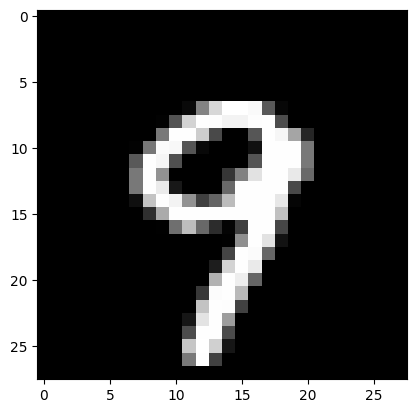

In [27]:
i= np.random.randint(0, 59999)
# plt.imshow(x_train[i])
print(y_train[i])

plt.imshow(x_train[i], cmap ='gray')

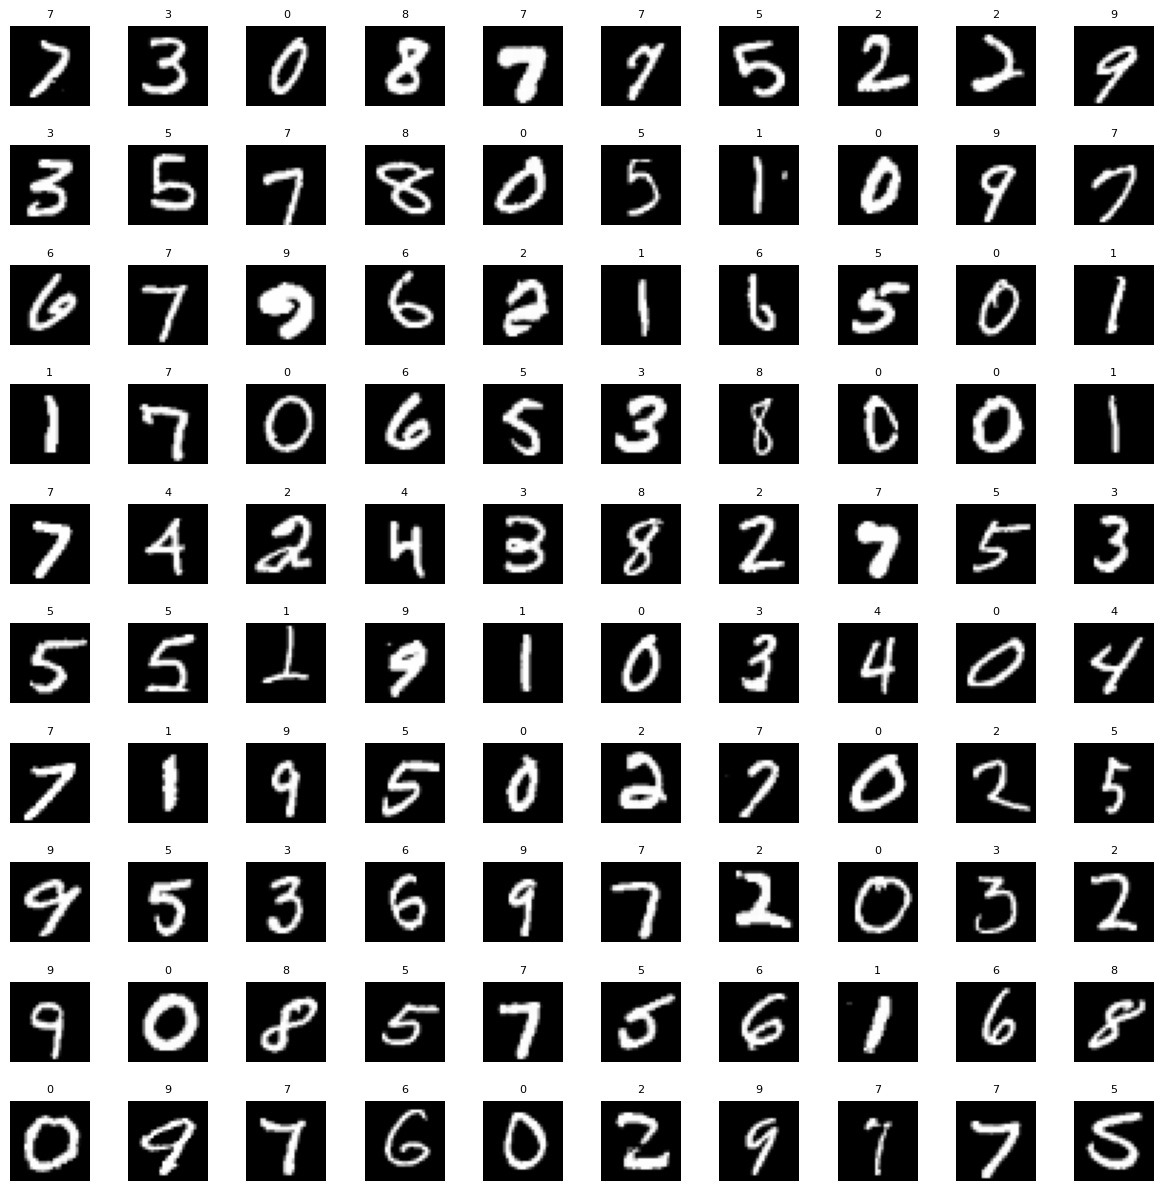

In [39]:
width = 10
height=10
fig, axis = plt.subplots(width, height, figsize=(15,15))
print(axis.shape)
axis = axis.ravel() # flatten the 10*10 matrix to only a vector with 100 positions
for i in np.arange(0, width*height):
  index = np.random.randint(0, x_train.shape[0])
  axis[i].imshow(x_train[index], cmap='gray')
  axis[i].set_title(y_train[index], fontsize=8)
  axis[i].axis('off') #turn off the info of y and x
plt.subplots_adjust(hspace=0.5)

### Pre-procesing the images

In [42]:
x_train[0].min(), x_train[0].max() # so we need to normalize the values from 0 to 1
#because the algorithm performs matrix multiplications, so if we have big values, the time to train the neural network will also be big

(0, 255)

In [43]:
x_train = x_train/255
x_test = x_test/255
#another reason is that if we don't do this process, the results won't be so good

In [44]:
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

In [45]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [47]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
#now the image are in the correct format to be sent to the input layer of the neural network (pixels)

### Build and train linear autoencoder

In [48]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [50]:
# 784 --> 128-->64 --> 32 -->64 -->128 -->784 # deep autoencoder (morw than 1 hidden layer)

autoencoder = Sequential()

#Encode
autoencoder.add(Dense(units=128, activation='relu', input_dim=784)) #1st hidden layer
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu')) #Encoded image

#Decode
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=784, activation='sigmoid'))#sigmoid because we need to predict the value of the pixels

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.0107 - loss: 0.2036
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.0125 - loss: 0.1151
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.0134 - loss: 0.1042
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.0135 - loss: 0.0985
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0147 - loss: 0.0950
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0152 - loss: 0.0926
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.0153 - loss: 0.0910
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.0164 - loss: 0.0898
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0148 - loss: 0.0884
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.0136 - loss: 0.0880


### Encoding the images

In [60]:
encoder = Model(inputs=autoencoder.inputs, outputs=autoencoder.get_layer('dense_3').output)

In [58]:
autoencoder.inputs

[<KerasTensor shape=(None, 784), dtype=float32, sparse=None, name=keras_tensor>]

In [59]:
autoencoder.get_layer('dense_3').output

<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_6>

In [62]:
encoder.summary( )

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

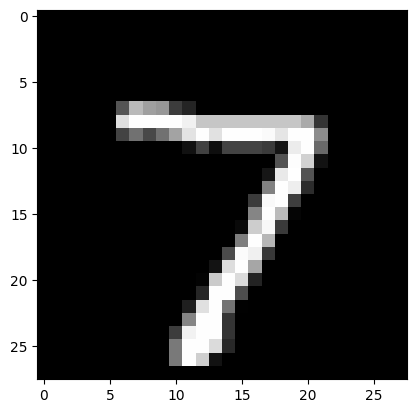

In [66]:
#to visualise an image we need a matrix representation

plt.imshow(x_test[0].reshape(28,28), cmap='gray')

In [67]:
encoded_image = encoder.predict(x_test[0].reshape(1,784)) # we reshape the image to put it in the batch format

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


In [68]:
encoded_image.shape

(1, 32)

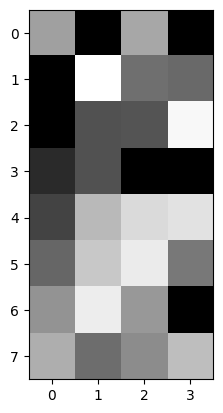

In [69]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray') #8*4 = 32 # this is the coded image

### Decode the image

In [70]:
autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

In [78]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.get_layer('dense_4')(input_layer_decoder)
decoder_layer2 = autoencoder.get_layer('dense_5')(decoder_layer1)
decoder_layer3 = autoencoder.get_layer('dense_6')(decoder_layer2)

In [80]:
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3)
decoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
decoded_image = decoder.predict(encoded_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


In [84]:
decoded_image, decoded_image.shape

(array([[4.94076611e-12, 1.14496455e-12, 1.02723266e-12, 2.24469800e-11,
         5.81563768e-13, 1.46070786e-12, 3.39749999e-11, 7.87955812e-12,
         2.56365610e-12, 1.27143062e-11, 1.79339130e-11, 3.65971706e-12,
         6.13349924e-17, 9.44141359e-23, 7.67078196e-22, 2.39533897e-13,
         7.87437390e-12, 1.83607782e-11, 1.91147770e-12, 8.34782850e-12,
         4.55511236e-12, 1.60225635e-11, 1.49916659e-11, 4.08867905e-12,
         5.32962216e-12, 2.33643313e-11, 2.03725873e-11, 4.47982589e-11,
         4.85198409e-11, 1.30326804e-12, 6.60147197e-12, 3.26028510e-11,
         9.30891852e-14, 9.98400378e-14, 1.29226274e-13, 1.67485234e-13,
         1.70491038e-10, 6.53923259e-13, 1.14540798e-16, 9.69566004e-16,
         2.62403650e-15, 5.61031373e-20, 1.69398077e-21, 2.29058105e-20,
         1.63075879e-20, 1.86001865e-22, 2.05352296e-26, 1.23599243e-26,
         1.51567544e-26, 3.09727775e-23, 2.52137120e-18, 5.33288608e-16,
         5.12183134e-12, 1.34361845e-11, 1.42246848

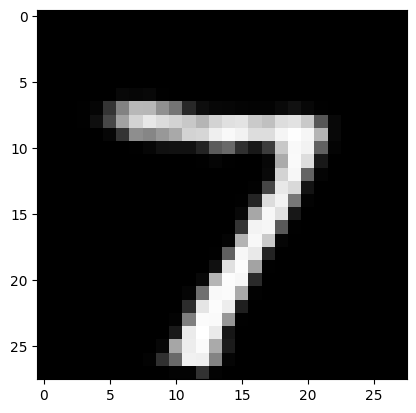

In [83]:
plt.imshow(decoded_image.reshape(28,28), cmap='gray')

### Encoding and decoding the test images

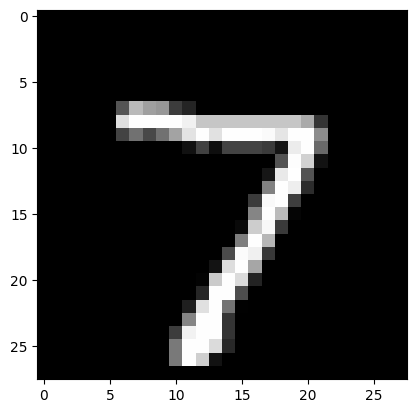

In [85]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

In [87]:
n_images = 10
test_images = np.random.randint(0, x_test.shape[0]-1, size=n_images)
test_images

array([2896, 9538, 4784, 4070, 2693, 5977, 8821, 6516, 4480, 2595])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


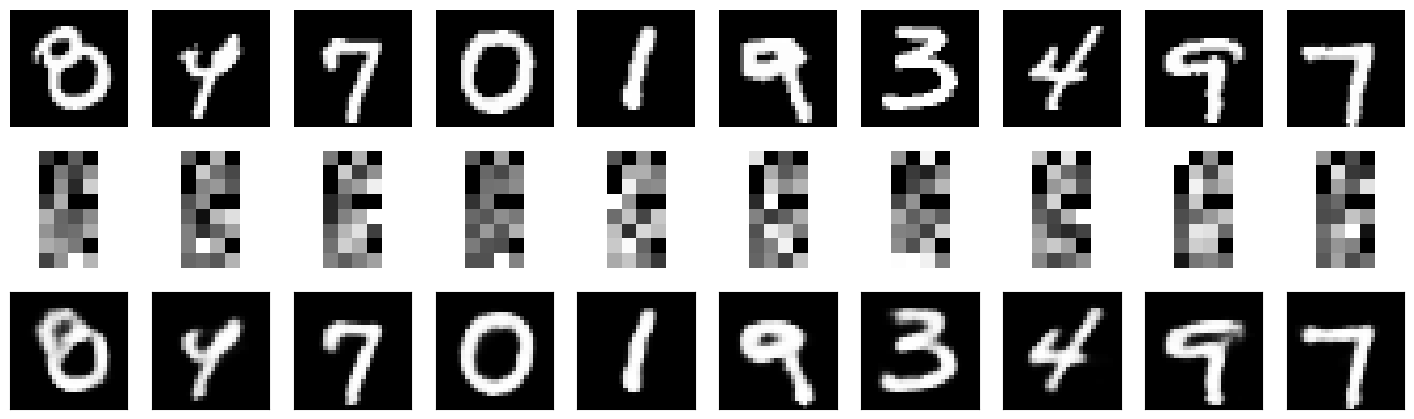

In [92]:
plt.figure(figsize=(18,18))
for i, image in enumerate(test_images):
  #original image
  ax= plt.subplot(10,10, i+1)
  plt.imshow(x_test[image].reshape(28,28), cmap='gray')
  plt.axis('off')


  #coded images
  ax = plt.subplot(10,10, i+1+n_images)
  encoded_image = encoder.predict(x_test[image].reshape(1,784))
  plt.imshow(encoded_image.reshape(8,4), cmap='gray')
  plt.axis('off')

  # decoded_image
  ax = plt.subplot(10,10, i+1+2*n_images)
  decoded_image = decoder.predict(encoded_image)
  plt.imshow(decoded_image.reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())